In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [38]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
df = pd.read_csv('/content/IRIS.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [39]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
count,151,151,151,151,151
unique,36,24,44,23,4
top,5,3,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [40]:
df['Sepal length'] = pd.to_numeric(df['Sepal length'], errors='coerce')
df['Petal length'] = pd.to_numeric(df['Petal length'], errors='coerce')
df['Sepal width'] = pd.to_numeric(df['Sepal width'], errors='coerce')
df['Petal width'] = pd.to_numeric(df['Petal width'], errors='coerce')

df['Sepal length'] = df['Sepal length'].fillna(0)
df['Petal length'] = df['Petal length'].fillna(0)
df['Sepal width'] = df['Sepal width'].fillna(0)
df['Petal width'] = df['Petal width'].fillna(0)

df['Sepal Petal_len_diff'] = df['Sepal length'] - df['Petal length']
df['Sepal Petal_width_diff'] = df['Sepal width'] - df['Petal width']
df.head()


,Sepal length,Sepal width,Petal length,Petal width,Class_labels,Sepal Petal_len_diff,Sepal Petal_width_diff
0,0.0,0.0,0.0,0.0,species,0.0,0.0
1,5.1,3.5,1.4,0.2,Iris-setosa,3.7,3.3
2,4.9,3.0,1.4,0.2,Iris-setosa,3.5,2.8
3,4.7,3.2,1.3,0.2,Iris-setosa,3.4,3.0
4,4.6,3.1,1.5,0.2,Iris-setosa,3.1,2.9


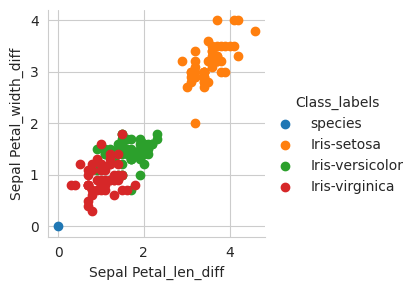

In [41]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Class_labels').map(plt.scatter,'Sepal Petal_len_diff','Sepal Petal_width_diff').add_legend()
plt.show()

In [42]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [44]:
import time
from sklearn.svm import SVC

start = time.time()
svn = SVC()
svn.fit(X_train, y_train)

end = time.time()
print(end - start)

0.002835988998413086


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

start = time.time()

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

end = time.time()
print(end - start)

0.17309784889221191


In [46]:
import time
start = time.time()

rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))

end = time.time()
print(" Time taken by this model is:")
print(end - start)

Accuracy Score: 1.0
 Time taken by this model is:
0.03389286994934082


In [47]:
import time

start = time.time()
predictions = svn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(y_test, predictions))

end = time.time()
print(" Time taken by this model is:")
print(end - start)

Accuracy Score: 1.0
 Time taken by this model is:
0.015129327774047852


### Testing

In [48]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
